In [47]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#location of the Deepsense6G dataset we wish to process
scenario_folder = "/data/david/DeepSense6G/scenario36/"

#location that we wish to save the dataset to
dataset_folder = "/data/david/DeepSense6G/scenario36/generated_dataset/"
sample_idx = 10000

#specifying the names for the files
file_name = "frame"

radar_data_folder = "radar"
lidar_data_folder = "lidar"

Fetch scenario CSV and load Dataframe

In [48]:
try:
    csv_file = [f for f in os.listdir(scenario_folder) if f.endswith('csv')][0]
    csv_path = os.path.join(scenario_folder, csv_file)
except:
    raise Exception(f'No csv file inside {scenario_folder}.')

dataframe = pd.read_csv(csv_path)
print(f'Columns: {dataframe.columns.values}')
print(f'Number of Rows: {dataframe.shape[0]}')

Columns: ['abs_index' 'timestamp' 'seq_index' 'unit1_gps1' 'unit1_gps1_lat'
 'unit1_gps1_lon' 'unit1_gps1_altitude' 'unit1_gps1_hdop'
 'unit1_gps1_pdop' 'unit1_gps1_vdop' 'unit1_rgb1' 'unit1_rgb2'
 'unit1_rgb3' 'unit1_rgb4' 'unit1_rgb5' 'unit1_rgb6' 'unit1_pwr1'
 'unit1_pwr1_best-beam' 'unit1_pwr1_max-pwr' 'unit1_pwr1_min-pwr'
 'unit1_pwr2' 'unit1_pwr2_best-beam' 'unit1_pwr2_max-pwr'
 'unit1_pwr2_min-pwr' 'unit1_pwr3' 'unit1_pwr3_best-beam'
 'unit1_pwr3_max-pwr' 'unit1_pwr3_min-pwr' 'unit1_pwr4'
 'unit1_pwr4_best-beam' 'unit1_pwr4_max-pwr' 'unit1_pwr4_min-pwr'
 'unit1_radar1' 'unit1_radar2' 'unit1_radar3' 'unit1_radar4'
 'unit1_lidar1' 'unit2_gps1' 'unit2_gps1_lat' 'unit2_gps1_lon'
 'unit2_gps1_altitude' 'unit2_gps1_hdop' 'unit2_gps1_pdop'
 'unit2_gps1_vdop' 'satellite_img' 'unit1_pwr1_best-beam_v2'
 'unit1_pwr1_max-pwr_v2' 'unit1_pwr1_min-pwr_v2' 'unit1_pwr2_best-beam_v2'
 'unit1_pwr2_max-pwr_v2' 'unit1_pwr2_min-pwr_v2' 'unit1_pwr3_best-beam_v2'
 'unit1_pwr3_max-pwr_v2' 'unit1_pwr3_mi

Camera Data

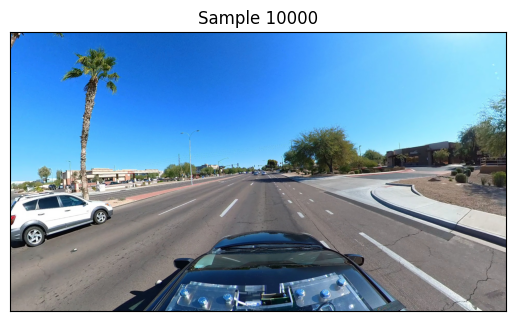

In [49]:
img_rel_paths = dataframe['unit1_rgb5'].values

#create the figure
fig,ax = plt.subplots()

#get path to image
img_abs_path = os.path.join(scenario_folder, img_rel_paths[sample_idx])

#plot the rgb camera image
img = plt.imread(img_abs_path)
ax.imshow(img)
ax.set_title(f'Sample {sample_idx}')
ax.get_yaxis().set_visible(False)
ax.get_xaxis().set_visible(False)

Radar Data

max range: 24.957747086247085m


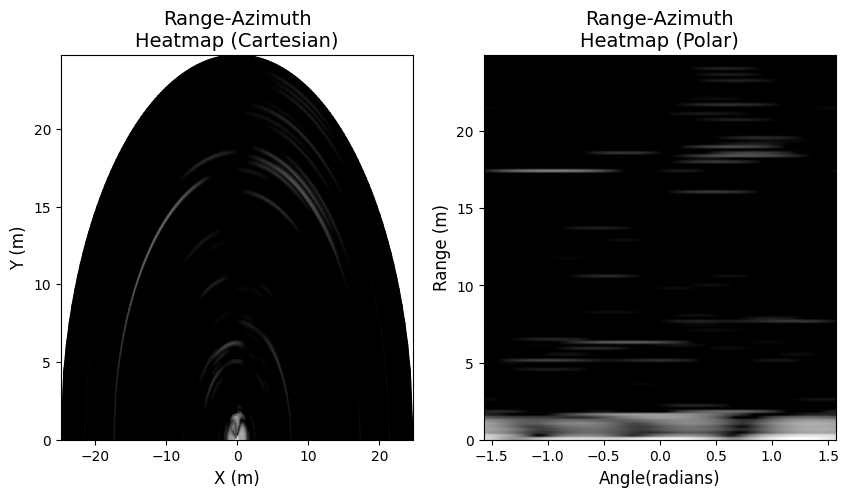

In [50]:
from Radar_Data_Processor import RadarDataProcessor

#initialize the radar
#initialize a raw data processor
radar_data_processor = RadarDataProcessor()
radar_data_processor.configure(
    scenario_data_path=scenario_folder,
    radar_rel_paths=dataframe["unit1_radar1"].values,
    save_file_folder= os.path.join(dataset_folder,radar_data_folder),
    save_file_name=file_name,
    max_range_bin=128,
    num_chirps_to_save=5,
    num_angle_bins=128,
    power_range_dB=[-40,-10],
    chirps_per_frame= 250,
    rx_channels = 4,
    tx_channels = 1,
    samples_per_chirp = 256,
    adc_sample_rate_Hz = 5e6,
    chirp_slope_MHz_us= 15.015,
    start_freq_Hz=77e9,
    idle_time_us = 5,
    ramp_end_time_us = 60
)

radar_data_processor.plot_range_azimuth_response(sample_idx)


In [51]:
# import warnings
# warnings.filterwarnings('ignore')
# #save the generated responses to a file
# radar_data_processor.generate_and_save_all_grids()

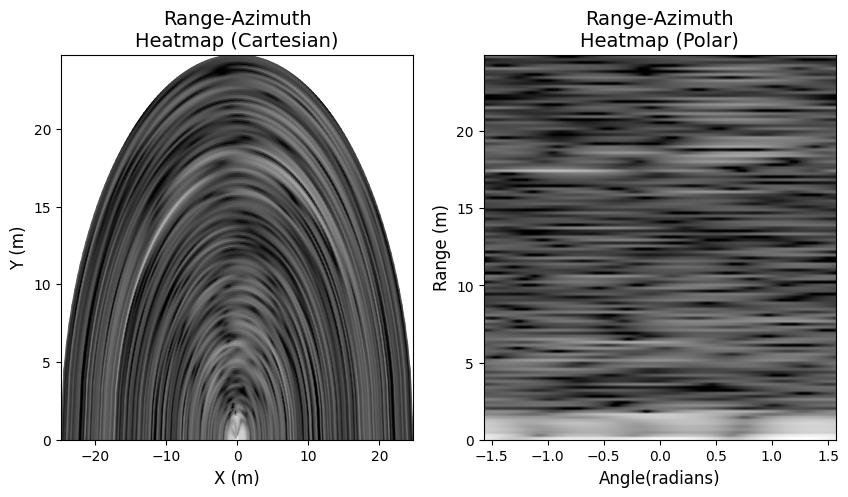

In [52]:
#plot a response from a previously saved file
radar_data_processor.plot_from_saved_range_azimuth_response(sample_idx)

Lidar Data

plot the filtered lidar point cloud in cartesian coordinates

/home/david/Documents/radar-dev/datasets/Deepsense_6G/Lidar_Data_Processor.py:308: RuntimeWarning: invalid value encountered in divide
  elevations = np.arccos(points_cart[:, 2] / ranges)


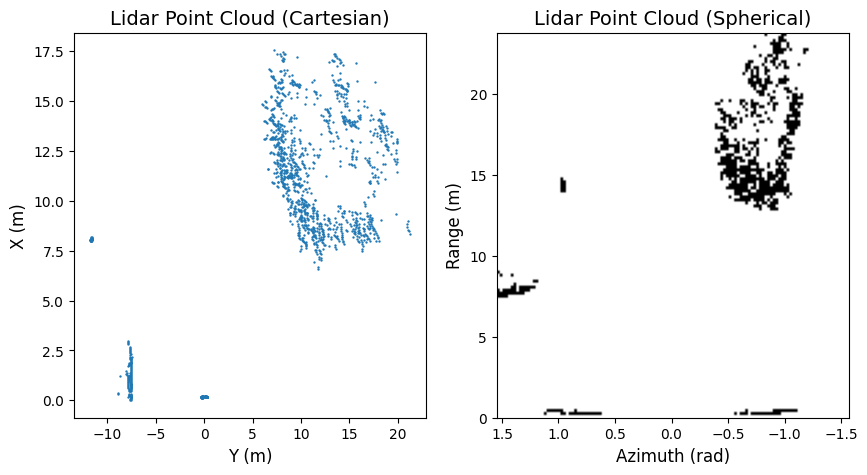

In [53]:
#custom point cloud importation
from Lidar_Data_Processor import LidarDataProcessor

lidar_data_processor = LidarDataProcessor()
lidar_data_processor.configure(
    scenario_data_path=scenario_folder,
    relative_paths=dataframe['unit1_lidar1'].values,
    save_file_folder= os.path.join(dataset_folder,lidar_data_folder),
    save_file_name=file_name,
    max_range_m=24,
    num_range_bins=128,
    angle_range_rad=[-np.pi /2 , np.pi /2],
    num_angle_bins=128
)

lidar_data_processor.plot_pointcloud(sample_idx)

In [54]:
# import warnings
# warnings.filterwarnings('ignore')
# #process and save all of the lidar data
# lidar_data_processor.generate_and_save_all_grids()

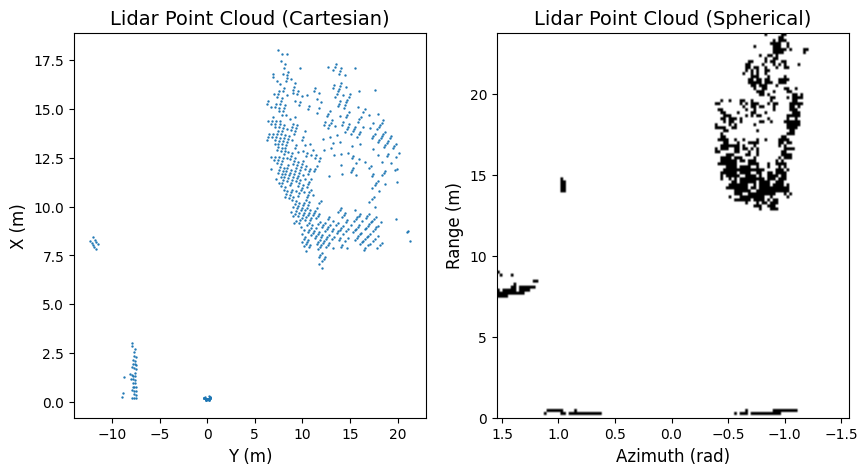

In [55]:
#load the grid from the file and diplay it
lidar_data_processor.plot_from_saved_grid(sample_idx)

lidar_data = lidar_data_processor.load_grid_from_file(sample_idx)